In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

In [ ]:
train_path="/content/drive/MyDrive/Colab Notebooks/ts_final/train_d.csv"
test_path="/content/drive/MyDrive/Colab Notebooks/ts_final/test_d.csv"
sub_path = "/content/drive/MyDrive/Colab Notebooks/ts_final/submission.csv"



train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sub = pd.read_csv(sub_path)

In [ ]:
print("train  ", train.shape)
print("test  ", test.shape)

train   (204000, 41)
test   (16800, 39)


In [ ]:
train.columns

Index(['건물번호', '일시', '기온', '강수량', '풍속', '습도', '전력소비량', 'datetime', 'day',
       'is_weekend', 'month', '태양광용량', 'ESS저장용량', 'PCS용량', '연면적_log',
       '냉방면적_log', 'weight', '태양광용량_exists', 'ESS저장용량_exists', 'PCS용량_exists',
       '불쾌지수', '체감온도', 'hour_sin', 'hour_cos', 'week_sin', 'week_cos', 'lag_1',
       'lag_24', 'lag_168', 'roll_m_6', 'roll_m_24', 'roll_s_24', '건물유형_건물기타',
       '건물유형_공공', '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소',
       '건물유형_학교', '건물유형_호텔'],
      dtype='object')

In [ ]:
test.columns

Index(['건물번호', '일시', '기온', '강수량', '풍속', '습도', 'datetime', 'day', 'is_weekend',
       'month', '태양광용량', 'ESS저장용량', 'PCS용량', '연면적_log', '냉방면적_log',
       '태양광용량_exists', 'ESS저장용량_exists', 'PCS용량_exists', '불쾌지수', '체감온도',
       'hour_sin', 'hour_cos', 'week_sin', 'week_cos', 'lag_1', 'lag_24',
       'lag_168', 'roll_m_6', 'roll_m_24', 'roll_s_24', '건물유형_건물기타', '건물유형_공공',
       '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소', '건물유형_학교',
       '건물유형_호텔'],
      dtype='object')

In [ ]:
test=test.reindex(columns=train.columns, fill_value = 0)

In [ ]:
train.head()

,건물번호,일시,기온,강수량,풍속,습도,전력소비량,datetime,day,is_weekend,...,roll_s_24,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔
0,1,20240601 00,0.326733,0.0,0.171053,0.82,0.630237,2024-06-01 00:00:00,0.0,1,...,0.147027,False,False,False,False,False,False,False,False,True
1,1,20240601 01,0.326733,0.0,0.177632,0.82,0.597644,2024-06-01 01:00:00,0.0,1,...,0.147027,False,False,False,False,False,False,False,False,True
2,1,20240601 02,0.320132,0.0,0.171053,0.80,0.556904,2024-06-01 02:00:00,0.0,1,...,0.147027,False,False,False,False,False,False,False,False,True
3,1,20240601 03,0.316832,0.0,0.171053,0.81,0.431037,2024-06-01 03:00:00,0.0,1,...,0.147027,False,False,False,False,False,False,False,False,True
4,1,20240601 04,0.310231,0.0,0.085526,0.81,0.278122,2024-06-01 04:00:00,0.0,1,...,0.147027,False,False,False,False,False,False,False,False,True


In [ ]:
test.head()

,건물번호,일시,기온,강수량,풍속,습도,전력소비량,datetime,day,is_weekend,...,roll_s_24,건물유형_건물기타,건물유형_공공,건물유형_백화점,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_학교,건물유형_호텔
0,1,20240825 00,0.597360,0.0,0.046053,0.80,0,2024-08-25 00:00:00,0.8,1,...,NaN,False,False,False,False,False,False,False,False,True
1,1,20240825 01,0.584158,0.0,0.000000,0.80,0,2024-08-25 01:00:00,0.8,1,...,NaN,False,False,False,False,False,False,False,False,True
2,1,20240825 02,0.577558,0.0,0.019737,0.83,0,2024-08-25 02:00:00,0.8,1,...,NaN,False,False,False,False,False,False,False,False,True
3,1,20240825 03,0.570957,0.0,0.072368,0.83,0,2024-08-25 03:00:00,0.8,1,...,NaN,False,False,False,False,False,False,False,False,True
4,1,20240825 04,0.564356,0.0,0.065789,0.86,0,2024-08-25 04:00:00,0.8,1,...,NaN,False,False,False,False,False,False,False,False,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   건물번호            204000 non-null  int64  
 1   일시              204000 non-null  object 
 2   기온              204000 non-null  float64
 3   강수량             204000 non-null  float64
 4   풍속              204000 non-null  float64
 5   습도              204000 non-null  float64
 6   전력소비량           204000 non-null  float64
 7   datetime        204000 non-null  object 
 8   day             204000 non-null  float64
 9   is_weekend      204000 non-null  int64  
 10  month           204000 non-null  float64
 11  태양광용량           204000 non-null  float64
 12  ESS저장용량         204000 non-null  float64
 13  PCS용량           204000 non-null  float64
 14  연면적_log         204000 non-null  float64
 15  냉방면적_log        204000 non-null  float64
 16  weight          204000 non-null  float64
 17  태양광용량_exis

In [ ]:
'''
scale_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ts_final/b_scale_m_info.csv") #건물별 min/max값
scale_dict = {int(r["건물번호"]): (r["min"], r["max"]) for _, r in scale_info.iterrows()}'''


'\nscale_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ts_final/b_scale_m_info.csv") #건물별 min/max값\nscale_dict = {int(r["건물번호"]): (r["min"], r["max"]) for _, r in scale_info.iterrows()}'

In [ ]:
'''
def inverse_scale(row):
    y_min, y_max = scale_dict[row["건물번호"]]
    return row["전력소비량"] * (y_max - y_min) + y_min

y_raw = train.apply(inverse_scale, axis=1)'''

'\ndef inverse_scale(row):\n    y_min, y_max = scale_dict[row["건물번호"]]\n    return row["전력소비량"] * (y_max - y_min) + y_min\n\ny_raw = train.apply(inverse_scale, axis=1)'

In [ ]:
#y_raw.head(10)

In [ ]:

#train["y_log"] = np.log1p(y_raw)

# LSTM

시퀀스 24  
rag, roll은 제거 하는것이 성능 높음  
불쾌지수 추가 시 성능 아주 약간 향상  

In [ ]:
SEQ_LEN = 24  #시퀀스 길이

class SeqDataset(Dataset):
    def __init__(self, df, target_col="전력소비량"):
        self.df = df.reset_index(drop=True)
        self.target = df[target_col].values.astype(np.float32)
        self.weight = df["weight"].values.astype(np.float32)
        self.X = df.drop(columns=[target_col, "datetime", "numdatetime","weight","일시"], errors="ignore").values.astype(np.float32)

    def __len__(self):
        return len(self.df) - SEQ_LEN

    def __getitem__(self, idx):
        X_seq = self.X[idx: idx + SEQ_LEN]
        y = self.target[idx + SEQ_LEN]
        w = self.weight[idx + SEQ_LEN]
        return torch.tensor(X_seq), torch.tensor(y), torch.tensor(w)



In [ ]:
'''
#건물별 시퀀스
import torch
from torch.utils.data import Dataset

class SeqDataset(Dataset):
    def __init__(self, df, seq_len=24, target_col="y_log"):
        self.seq_len = seq_len
        df = df.sort_values(["건물번호", "datetime"]).reset_index(drop=True).copy()

        # feature 구성 (weight는 feature 아님)
        drop_cols = ["전력소비량", "y_log", "datetime", "numdatetime", "일시","roll_m_6", "roll_m_24", "weight"]
        self.feature_cols = [c for c in df.columns if c not in drop_cols]

        self.X = df[self.feature_cols].values.astype(np.float32)
        self.y = df[target_col].values.astype(np.float32)

        if "weight" in df.columns:
            self.w = df["weight"].values.astype(np.float32)
        else:
            self.w = np.ones(len(df), dtype=np.float32)


        # (건물별) 시작 인덱스 목록 생성: 경계 넘지 않게
        self.start_idxs = []
        for _, df_b in df.groupby("건물번호", sort=False):
            n = len(df_b)
            base = df_b.index.min()
            for s in range(base, base + n - seq_len):
                self.start_idxs.append(s)

    def __len__(self):
        return len(self.start_idxs)

    def __getitem__(self, i):
        s = self.start_idxs[i]
        X_seq = self.X[s:s+self.seq_len]
        y_t   = self.y[s+self.seq_len]
        w_t   = self.w[s+self.seq_len]
        return torch.tensor(X_seq), torch.tensor(y_t), torch.tensor(w_t)'''


In [ ]:
test_id_col = test["datetime"].tolist()

In [ ]:
import torch.nn as nn

class LSTMSeqModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers,
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)           #(batch, seq,hidden)
        out = out[:, -1, :]
        return self.fc(out).squeeze(1)  # (batch,)


In [ ]:
train["datetime"] = pd.to_datetime(train["datetime"])

VAL_START = pd.Timestamp("2024-08-18 00:00:00")

train_df = train[train["datetime"] < VAL_START].copy()
val_df   = train[train["datetime"] >= VAL_START].copy()

print("Train rows:", len(train_df))
print("Val rows:", len(val_df))

train_dataset = SeqDataset(train_df)
val_dataset   = SeqDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=False)

input_dim = train_dataset[0][0].shape[1]
print(train_df.shape, val_df.shape)


Train rows: 187200
Val rows: 16800
(187200, 41) (16800, 41)


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train.iloc[:-40800], train.iloc[-40800:] #8:2

train_dataset = SeqDataset(train_df)
val_dataset   = SeqDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=False)

input_dim = train_dataset[0][0].shape[1]


In [ ]:

# 건물별로 시계열 분할
train_list = []
val_list   = []

for b_id, df_b in train.groupby("건물번호"):
    df_b = df_b.sort_values("datetime")
    split_idx = int(len(df_b) * 0.8)     # 8:2

    train_list.append(df_b.iloc[:split_idx])
    val_list.append(df_b.iloc[split_idx:])

train_df = pd.concat(train_list).reset_index(drop=True)
val_df   = pd.concat(val_list).reset_index(drop=True)

train_dataset = SeqDataset(train_df)
val_dataset   = SeqDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=False)

input_dim = train_dataset[0][0].shape[1]
print(train_df.shape, val_df.shape)

(163200, 41) (40800, 41)


In [ ]:
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0.0001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.stop = False

    def step(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.stop = True


In [ ]:
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

model = LSTMSeqModel(input_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion_train = nn.MSELoss(reduction='none')
criterion_val   = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.5, patience=2)

EPOCHS = 25
early_stopping = EarlyStopping(patience=5, min_delta=0.0001)

best_model_state = None

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0

    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    for batch_idx, (X_batch, y_batch, w_batch) in enumerate(tqdm(train_loader, desc="Training batches")):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        pred = model(X_batch)
        loss = criterion_train(pred, y_batch)
        loss = (loss * w_batch).mean()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)

        if batch_idx % 500 == 0:
            print(f"Batch {batch_idx}: Loss={loss.item():.4f}")

    train_loss /= len(train_loader.dataset)


    # validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch, w_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(X_batch)
            val_loss += criterion_val(pred, y_batch).item() * X_batch.size(0)


    val_loss /= len(val_loader.dataset)
    print(f"Epoch {epoch+1}/{EPOCHS} | Train={train_loss:.4f} | Val={val_loss:.4f}")

    early_stopping.step(val_loss)

    if early_stopping.best_loss == val_loss:
        best_model_state = model.state_dict()

    if early_stopping.stop:
        print(f"Early stopping at epoch {epoch+1}")
        break

model.load_state_dict(best_model_state)
print("Best epoch loaded.")


Epoch 1/25


Training batches:   0%|          | 2/2549 [00:00<02:26, 17.41it/s]

Batch 0: Loss=0.0897


Training batches:  20%|█▉        | 507/2549 [00:18<01:04, 31.68it/s]

Batch 500: Loss=0.0069


Training batches:  39%|███▉      | 1004/2549 [00:36<00:49, 31.28it/s]

Batch 1000: Loss=0.0103


Training batches:  59%|█████▉    | 1504/2549 [00:53<00:33, 31.07it/s]

Batch 1500: Loss=0.0078


Training batches:  79%|███████▊  | 2003/2549 [01:13<00:27, 19.90it/s]

Batch 2000: Loss=0.0051


Training batches:  98%|█████████▊| 2506/2549 [01:31<00:01, 31.12it/s]

Batch 2500: Loss=0.0060


Training batches: 100%|██████████| 2549/2549 [01:33<00:00, 27.35it/s]


Epoch 1/25 | Train=0.0099 | Val=0.0067

Epoch 2/25


Training batches:   0%|          | 2/2549 [00:00<02:28, 17.20it/s]

Batch 0: Loss=0.0063


Training batches:  20%|█▉        | 504/2549 [00:18<01:06, 30.98it/s]

Batch 500: Loss=0.0055


Training batches:  39%|███▉      | 1005/2549 [00:36<00:48, 31.71it/s]

Batch 1000: Loss=0.0042


Training batches:  59%|█████▉    | 1504/2549 [00:53<00:32, 31.78it/s]

Batch 1500: Loss=0.0047


Training batches:  79%|███████▊  | 2004/2549 [01:11<00:26, 20.74it/s]

Batch 2000: Loss=0.0088


Training batches:  98%|█████████▊| 2505/2549 [01:30<00:01, 30.18it/s]

Batch 2500: Loss=0.0059


Training batches: 100%|██████████| 2549/2549 [01:32<00:00, 27.69it/s]


Epoch 2/25 | Train=0.0052 | Val=0.0060

Epoch 3/25


Training batches:   0%|          | 2/2549 [00:00<02:20, 18.07it/s]

Batch 0: Loss=0.0065


Training batches:  20%|█▉        | 504/2549 [00:19<01:06, 30.73it/s]

Batch 500: Loss=0.0034


Training batches:  39%|███▉      | 1004/2549 [00:36<00:46, 33.31it/s]

Batch 1000: Loss=0.0055


Training batches:  59%|█████▉    | 1507/2549 [00:54<00:33, 30.67it/s]

Batch 1500: Loss=0.0049


Training batches:  79%|███████▊  | 2007/2549 [01:12<00:17, 31.19it/s]

Batch 2000: Loss=0.0045


Training batches:  98%|█████████▊| 2503/2549 [01:31<00:02, 20.19it/s]

Batch 2500: Loss=0.0039


Training batches: 100%|██████████| 2549/2549 [01:33<00:00, 27.23it/s]


Epoch 3/25 | Train=0.0045 | Val=0.0058

Epoch 4/25


Training batches:   0%|          | 3/2549 [00:00<01:31, 27.87it/s]

Batch 0: Loss=0.0032


Training batches:  20%|█▉        | 503/2549 [00:20<01:43, 19.67it/s]

Batch 500: Loss=0.0022


Training batches:  40%|███▉      | 1007/2549 [00:38<00:50, 30.34it/s]

Batch 1000: Loss=0.0033


Training batches:  59%|█████▉    | 1506/2549 [00:56<00:34, 30.39it/s]

Batch 1500: Loss=0.0043


Training batches:  79%|███████▊  | 2007/2549 [01:14<00:17, 30.30it/s]

Batch 2000: Loss=0.0047


Training batches:  98%|█████████▊| 2504/2549 [01:34<00:02, 19.88it/s]

Batch 2500: Loss=0.0023


Training batches: 100%|██████████| 2549/2549 [01:35<00:00, 26.58it/s]


Epoch 4/25 | Train=0.0040 | Val=0.0056

Epoch 5/25


Training batches:   0%|          | 3/2549 [00:00<01:27, 29.11it/s]

Batch 0: Loss=0.0034


Training batches:  20%|█▉        | 503/2549 [00:19<01:41, 20.13it/s]

Batch 500: Loss=0.0041


Training batches:  39%|███▉      | 1004/2549 [00:38<00:50, 30.58it/s]

Batch 1000: Loss=0.0033


Training batches:  59%|█████▉    | 1506/2549 [00:56<00:35, 29.72it/s]

Batch 1500: Loss=0.0050


Training batches:  79%|███████▊  | 2004/2549 [01:14<00:18, 30.13it/s]

Batch 2000: Loss=0.0081


Training batches:  98%|█████████▊| 2503/2549 [01:33<00:02, 20.41it/s]

Batch 2500: Loss=0.0031


Training batches: 100%|██████████| 2549/2549 [01:35<00:00, 26.75it/s]


Epoch 5/25 | Train=0.0037 | Val=0.0052

Epoch 6/25


Training batches:   0%|          | 4/2549 [00:00<01:20, 31.45it/s]

Batch 0: Loss=0.0022


Training batches:  20%|█▉        | 503/2549 [00:18<01:44, 19.49it/s]

Batch 500: Loss=0.0045


Training batches:  39%|███▉      | 1004/2549 [00:37<00:51, 29.81it/s]

Batch 1000: Loss=0.0049


Training batches:  59%|█████▉    | 1505/2549 [00:55<00:34, 29.95it/s]

Batch 1500: Loss=0.0043


Training batches:  79%|███████▊  | 2007/2549 [01:14<00:17, 30.79it/s]

Batch 2000: Loss=0.0028


Training batches:  98%|█████████▊| 2504/2549 [01:32<00:02, 21.53it/s]

Batch 2500: Loss=0.0053


Training batches: 100%|██████████| 2549/2549 [01:34<00:00, 26.95it/s]


Epoch 6/25 | Train=0.0034 | Val=0.0048

Epoch 7/25


Training batches:   0%|          | 3/2549 [00:00<01:28, 28.65it/s]

Batch 0: Loss=0.0018


Training batches:  20%|█▉        | 504/2549 [00:18<01:37, 20.96it/s]

Batch 500: Loss=0.0023


Training batches:  39%|███▉      | 1006/2549 [00:37<00:53, 28.61it/s]

Batch 1000: Loss=0.0034


Training batches:  59%|█████▉    | 1506/2549 [00:55<00:32, 32.43it/s]

Batch 1500: Loss=0.0030


Training batches:  79%|███████▊  | 2005/2549 [01:12<00:16, 32.72it/s]

Batch 2000: Loss=0.0048


Training batches:  98%|█████████▊| 2506/2549 [01:30<00:01, 30.66it/s]

Batch 2500: Loss=0.0063


Training batches: 100%|██████████| 2549/2549 [01:31<00:00, 27.77it/s]


Epoch 7/25 | Train=0.0033 | Val=0.0049

Epoch 8/25


Training batches:   0%|          | 3/2549 [00:00<01:32, 27.66it/s]

Batch 0: Loss=0.0016


Training batches:  20%|█▉        | 505/2549 [00:17<01:03, 32.03it/s]

Batch 500: Loss=0.0026


Training batches:  39%|███▉      | 1005/2549 [00:35<01:11, 21.74it/s]

Batch 1000: Loss=0.0017


Training batches:  59%|█████▉    | 1504/2549 [00:55<00:47, 22.05it/s]

Batch 1500: Loss=0.0089


Training batches:  79%|███████▊  | 2005/2549 [01:12<00:17, 30.98it/s]

Batch 2000: Loss=0.0061


Training batches:  98%|█████████▊| 2506/2549 [01:30<00:01, 30.25it/s]

Batch 2500: Loss=0.0019


Training batches: 100%|██████████| 2549/2549 [01:31<00:00, 27.73it/s]


Epoch 8/25 | Train=0.0031 | Val=0.0048

Epoch 9/25


Training batches:   0%|          | 3/2549 [00:00<01:25, 29.72it/s]

Batch 0: Loss=0.0047


Training batches:  20%|█▉        | 506/2549 [00:17<01:03, 32.42it/s]

Batch 500: Loss=0.0037


Training batches:  39%|███▉      | 1004/2549 [00:34<00:46, 33.52it/s]

Batch 1000: Loss=0.0051


Training batches:  59%|█████▉    | 1504/2549 [00:51<00:36, 28.66it/s]

Batch 1500: Loss=0.0014


Training batches:  79%|███████▊  | 2003/2549 [01:10<00:25, 21.46it/s]

Batch 2000: Loss=0.0016


Training batches:  98%|█████████▊| 2505/2549 [01:27<00:01, 32.88it/s]

Batch 2500: Loss=0.0034


Training batches: 100%|██████████| 2549/2549 [01:29<00:00, 28.59it/s]


Epoch 9/25 | Train=0.0030 | Val=0.0047

Epoch 10/25


Training batches:   0%|          | 2/2549 [00:00<02:30, 16.95it/s]

Batch 0: Loss=0.0027


Training batches:  20%|█▉        | 505/2549 [00:18<01:32, 22.00it/s]

Batch 500: Loss=0.0019


Training batches:  39%|███▉      | 1004/2549 [00:35<00:47, 32.70it/s]

Batch 1000: Loss=0.0016


Training batches:  59%|█████▉    | 1504/2549 [00:52<00:32, 32.24it/s]

Batch 1500: Loss=0.0019


Training batches:  79%|███████▊  | 2004/2549 [01:09<00:16, 32.30it/s]

Batch 2000: Loss=0.0047


Training batches:  98%|█████████▊| 2506/2549 [01:27<00:01, 31.89it/s]

Batch 2500: Loss=0.0019


Training batches: 100%|██████████| 2549/2549 [01:29<00:00, 28.45it/s]


Epoch 10/25 | Train=0.0029 | Val=0.0048

Epoch 11/25


Training batches:   0%|          | 3/2549 [00:00<01:25, 29.88it/s]

Batch 0: Loss=0.0023


Training batches:  20%|█▉        | 507/2549 [00:17<01:04, 31.74it/s]

Batch 500: Loss=0.0017


Training batches:  39%|███▉      | 1002/2549 [00:36<01:15, 20.60it/s]

Batch 1000: Loss=0.0026


Training batches:  59%|█████▉    | 1505/2549 [00:54<00:33, 30.93it/s]

Batch 1500: Loss=0.0031


Training batches:  79%|███████▊  | 2005/2549 [01:12<00:17, 31.74it/s]

Batch 2000: Loss=0.0015


Training batches:  98%|█████████▊| 2506/2549 [01:29<00:01, 31.67it/s]

Batch 2500: Loss=0.0024


Training batches: 100%|██████████| 2549/2549 [01:31<00:00, 27.94it/s]


Epoch 11/25 | Train=0.0028 | Val=0.0044

Epoch 12/25


Training batches:   0%|          | 3/2549 [00:00<01:40, 25.43it/s]

Batch 0: Loss=0.0015


Training batches:  20%|█▉        | 507/2549 [00:18<01:06, 30.78it/s]

Batch 500: Loss=0.0016


Training batches:  40%|███▉      | 1007/2549 [00:36<00:48, 31.58it/s]

Batch 1000: Loss=0.0059


Training batches:  59%|█████▉    | 1505/2549 [00:54<00:49, 20.95it/s]

Batch 1500: Loss=0.0027


Training batches:  79%|███████▊  | 2007/2549 [01:12<00:16, 32.61it/s]

Batch 2000: Loss=0.0022


Training batches:  98%|█████████▊| 2505/2549 [01:30<00:01, 32.02it/s]

Batch 2500: Loss=0.0035


Training batches: 100%|██████████| 2549/2549 [01:31<00:00, 27.78it/s]


Epoch 12/25 | Train=0.0028 | Val=0.0049

Epoch 13/25


Training batches:   0%|          | 4/2549 [00:00<01:21, 31.42it/s]

Batch 0: Loss=0.0020


Training batches:  20%|█▉        | 504/2549 [00:17<01:05, 30.99it/s]

Batch 500: Loss=0.0018


Training batches:  39%|███▉      | 1005/2549 [00:35<00:48, 31.80it/s]

Batch 1000: Loss=0.0055


Training batches:  59%|█████▉    | 1504/2549 [00:52<00:33, 30.80it/s]

Batch 1500: Loss=0.0025


Training batches:  79%|███████▊  | 2004/2549 [01:10<00:26, 20.35it/s]

Batch 2000: Loss=0.0020


Training batches:  98%|█████████▊| 2505/2549 [01:29<00:01, 31.78it/s]

Batch 2500: Loss=0.0019


Training batches: 100%|██████████| 2549/2549 [01:30<00:00, 28.13it/s]


Epoch 13/25 | Train=0.0027 | Val=0.0047

Epoch 14/25


Training batches:   0%|          | 2/2549 [00:00<02:13, 19.10it/s]

Batch 0: Loss=0.0032


Training batches:  20%|█▉        | 504/2549 [00:19<01:23, 24.42it/s]

Batch 500: Loss=0.0013


Training batches:  39%|███▉      | 1006/2549 [00:37<00:50, 30.45it/s]

Batch 1000: Loss=0.0025


Training batches:  59%|█████▉    | 1505/2549 [00:55<00:32, 31.79it/s]

Batch 1500: Loss=0.0021


Training batches:  79%|███████▊  | 2006/2549 [01:13<00:17, 31.62it/s]

Batch 2000: Loss=0.0036


Training batches:  98%|█████████▊| 2505/2549 [01:31<00:02, 20.40it/s]

Batch 2500: Loss=0.0027


Training batches: 100%|██████████| 2549/2549 [01:33<00:00, 27.17it/s]


Epoch 14/25 | Train=0.0026 | Val=0.0047

Epoch 15/25


Training batches:   0%|          | 3/2549 [00:00<01:26, 29.44it/s]

Batch 0: Loss=0.0015


Training batches:  20%|█▉        | 505/2549 [00:18<01:38, 20.80it/s]

Batch 500: Loss=0.0022


Training batches:  40%|███▉      | 1007/2549 [00:37<00:49, 31.13it/s]

Batch 1000: Loss=0.0016


Training batches:  59%|█████▉    | 1504/2549 [00:54<00:33, 31.34it/s]

Batch 1500: Loss=0.0035


Training batches:  79%|███████▊  | 2006/2549 [01:12<00:16, 32.44it/s]

Batch 2000: Loss=0.0019


Training batches:  98%|█████████▊| 2504/2549 [01:30<00:01, 31.52it/s]

Batch 2500: Loss=0.0025


Training batches: 100%|██████████| 2549/2549 [01:32<00:00, 27.61it/s]


Epoch 15/25 | Train=0.0026 | Val=0.0045

Epoch 16/25


Training batches:   0%|          | 4/2549 [00:00<01:20, 31.51it/s]

Batch 0: Loss=0.0020


Training batches:  20%|█▉        | 506/2549 [00:17<01:04, 31.71it/s]

Batch 500: Loss=0.0029


Training batches:  39%|███▉      | 1003/2549 [00:35<01:16, 20.32it/s]

Batch 1000: Loss=0.0015


Training batches:  59%|█████▉    | 1505/2549 [00:54<00:34, 30.37it/s]

Batch 1500: Loss=0.0025


Training batches:  79%|███████▊  | 2005/2549 [01:12<00:17, 31.99it/s]

Batch 2000: Loss=0.0024


Training batches:  98%|█████████▊| 2505/2549 [01:29<00:01, 31.32it/s]

Batch 2500: Loss=0.0028


Training batches: 100%|██████████| 2549/2549 [01:31<00:00, 27.96it/s]


Epoch 16/25 | Train=0.0026 | Val=0.0044
Early stopping at epoch 16
Best epoch loaded.


# LSTM

학습률 0.001  => 16.1961218482  
에폭 25, 브레이크 적용   

예측루프

In [ ]:

last_values_dict = {}

for b_id, df_b in train.groupby("건물번호"):
    last_values_dict[b_id] = df_b["전력소비량"].values[-168:].tolist()


#for b_id, df_b in train.groupby("건물번호"):
#    last_values_dict[b_id] = df_b.sort_values("datetime")["y_log"].values[-168:].tolist()

for b in last_values_dict:
    print(b, last_values_dict[b][:5])


print("done")


1 [0.3478415879745616, 0.3297022547697051, 0.3286856812487955, 0.3220659086529197, 0.3457698978608595]
2 [0.1414221449749514, 0.1444637562621409, 0.1353133626418566, 0.1343676515693692, 0.1476076065841939]
3 [0.2739147443590577, 0.2482909751553207, 0.2526571938176731, 0.2410868801262458, 0.2455558723486079]
4 [0.2913677666188426, 0.2699665231946437, 0.2725968436154949, 0.2696078431372549, 0.278574844571975]
5 [0.4373344370860928, 0.4245033112582781, 0.4173013245033113, 0.4048013245033112, 0.3975165562913907]
6 [0.2953429143169002, 0.2609605239221393, 0.2563216299799891, 0.2272148444606149, 0.2354920865926869]
7 [0.7715380011968881, 0.7743763358126015, 0.799047619047619, 0.8166572625459521, 0.8170248781738907]
8 [0.188312948941953, 0.161133760434867, 0.1624927198602213, 0.1545331003688604, 0.1588041157056882]
9 [0.2883618958286116, 0.2402997098496289, 0.2239992280608844, 0.1953185483056609, 0.223355197461577]
10 [0.5602008665493706, 0.4891877197188947, 0.4545142629433635, 0.429082423501

In [ ]:
model.eval()
test_preds_all = []
test_bids_all = []

seq_len = 24
#alpha=0.2

feature_cols = train_df.drop(columns=["전력소비량", "y_log", "datetime", "numdatetime","weight","일시"], errors="ignore").columns

for b_id, test_b in test.groupby("건물번호"):

    print(f"[Predicting Building {b_id}]")
    test_b = test_b.sort_values("datetime").reset_index(drop=True) #건물별 시간순 정렬

    last_vals = (
        train[train["건물번호"] == b_id]
        .sort_values("datetime")["전력소비량"]
        .values[-168:]
        .tolist()
    )

    preds = []
    test_bids = []

    # autoregressive
    for i in range(len(test_b)):

        if i == 0:
            print("[DEBUG] 초기 last_vals[:5] =", last_vals[:5])



        row = test_b.iloc[i].copy()



        # === lag/roll ===

        row["lag_1"]  = last_vals[-1]
        row["lag_24"] = last_vals[-24]
        row["lag_168"] = last_vals[-168]
        row["roll_m_6"]  = np.mean(last_vals[-6:])
        row["roll_m_24"] = np.mean(last_vals[-24:])
        row["roll_s_24"] = np.std(last_vals[-24:])


        seq_start = i - (seq_len - 1)
        if seq_start < 0:
            need = -seq_start
            past = train[train["건물번호"] == b_id].sort_values("datetime").iloc[-need:]
            seq_df = pd.concat([past, test_b.iloc[:i+1]], axis=0)
        else:
            seq_df = test_b.iloc[seq_start:i+1]


        if len(seq_df) > seq_len:
            seq_df = seq_df.iloc[-seq_len:]

        if len(seq_df) < seq_len:
            #pad_row = seq_df.iloc[[-1]].copy()
            pad = seq_df.iloc[[0]].copy()
            while len(seq_df) < seq_len:
                seq_df = pd.concat([pad, seq_df], axis=0)

        seq_df = seq_df.iloc[-seq_len:].copy()
        seq_df = seq_df.copy()

        # 컬럼재정렬
        row = row.reindex(seq_df.columns)
        seq_df.iloc[-1] = row

        seq_feat = seq_df[feature_cols].copy()
        seq_feat = seq_feat.fillna(0.0)

        #X_seq = seq_df[feature_cols].values.astype(np.float32)
        #X_seq = torch.tensor(X_seq).unsqueeze(0).to(device)
        X_seq = torch.tensor(seq_feat.values.astype(np.float32)).unsqueeze(0).to(device)


        # 예측
        with torch.no_grad():
            pred = model(X_seq).item()


        if np.isnan(pred):
            print(f"⚠ NaN prediction detected: building {b_id}, step {i}")
            print("  last_vals:", last_vals[-5:])
            print("  seq_feat sample row:", seq_feat.tail(1))
            pred = last_vals[-1]

        #스무딩
        #new_val = alpha * pred + (1 - alpha) * last_vals[-1]
        #new_val=pred
        #last_vals.append(new_val)
        #last_vals = last_vals[-168:]




        #pred_power = np.expm1(pred)
        #preds.append(pred_power)

        preds.append(pred)
        #autoregressive 업데이트
        last_vals.append(pred)
        last_vals = last_vals[-168:]


    test_preds_all.extend(preds)
    test_bids_all.extend(test_bids)


[Predicting Building 1]
[DEBUG] 초기 last_vals[:5] = [0.3478415879745616, 0.3297022547697051, 0.3286856812487955, 0.3220659086529197, 0.3457698978608595]
[Predicting Building 2]
[DEBUG] 초기 last_vals[:5] = [0.1414221449749514, 0.1444637562621409, 0.1353133626418566, 0.1343676515693692, 0.1476076065841939]
[Predicting Building 3]
[DEBUG] 초기 last_vals[:5] = [0.2739147443590577, 0.2482909751553207, 0.2526571938176731, 0.2410868801262458, 0.2455558723486079]
[Predicting Building 4]
[DEBUG] 초기 last_vals[:5] = [0.2913677666188426, 0.2699665231946437, 0.2725968436154949, 0.2696078431372549, 0.278574844571975]
[Predicting Building 5]
[DEBUG] 초기 last_vals[:5] = [0.4373344370860928, 0.4245033112582781, 0.4173013245033113, 0.4048013245033112, 0.3975165562913907]
[Predicting Building 6]
[DEBUG] 초기 last_vals[:5] = [0.2953429143169002, 0.2609605239221393, 0.2563216299799891, 0.2272148444606149, 0.2354920865926869]
[Predicting Building 7]
[DEBUG] 초기 last_vals[:5] = [0.7715380011968881, 0.774376335812601

In [ ]:
print(sorted(last_values_dict.keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
train.groupby("건물번호").size().sort_values().head()


,0
건물번호,
1,2040
2,2040
3,2040
4,2040
5,2040


In [ ]:
print("seq_df columns:", seq_df.columns.tolist())
print("row index:", row.index.tolist())

seq_df columns: ['건물번호', '일시', '기온', '강수량', '풍속', '습도', '전력소비량', 'datetime', 'day', 'is_weekend', 'month', '태양광용량', 'ESS저장용량', 'PCS용량', '연면적_log', '냉방면적_log', 'weight', '태양광용량_exists', 'ESS저장용량_exists', 'PCS용량_exists', '불쾌지수', '체감온도', 'hour_sin', 'hour_cos', 'week_sin', 'week_cos', 'lag_1', 'lag_24', 'lag_168', 'roll_m_6', 'roll_m_24', 'roll_s_24', '건물유형_건물기타', '건물유형_공공', '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소', '건물유형_학교', '건물유형_호텔']
row index: ['건물번호', '일시', '기온', '강수량', '풍속', '습도', '전력소비량', 'datetime', 'day', 'is_weekend', 'month', '태양광용량', 'ESS저장용량', 'PCS용량', '연면적_log', '냉방면적_log', 'weight', '태양광용량_exists', 'ESS저장용량_exists', 'PCS용량_exists', '불쾌지수', '체감온도', 'hour_sin', 'hour_cos', 'week_sin', 'week_cos', 'lag_1', 'lag_24', 'lag_168', 'roll_m_6', 'roll_m_24', 'roll_s_24', '건물유형_건물기타', '건물유형_공공', '건물유형_백화점', '건물유형_병원', '건물유형_상용', '건물유형_아파트', '건물유형_연구소', '건물유형_학교', '건물유형_호텔']


In [ ]:
test_preds_all

[0.3550127148628235,
 0.3893708884716034,
 0.3867693543434143,
 0.3534182906150818,
 0.35603928565979004,
 0.3693041205406189,
 0.39703869819641113,
 0.45740050077438354,
 0.5437489151954651,
 0.6246615052223206,
 0.6831924915313721,
 0.7255666851997375,
 0.742216169834137,
 0.7526161074638367,
 0.7560510635375977,
 0.755619466304779,
 0.7598687410354614,
 0.7604119181632996,
 0.761776328086853,
 0.7736493945121765,
 0.7681106925010681,
 0.7532790303230286,
 0.7766715288162231,
 0.7812204957008362,
 0.7576541304588318,
 0.7392304539680481,
 0.7262021899223328,
 0.7084599733352661,
 0.6911731362342834,
 0.6811146140098572,
 0.6692051887512207,
 0.6578699946403503,
 0.6558529138565063,
 0.6568425297737122,
 0.6590069532394409,
 0.66255784034729,
 0.6672506928443909,
 0.673931360244751,
 0.6969701647758484,
 0.7076173424720764,
 0.6950925588607788,
 0.6924545764923096,
 0.6972224116325378,
 0.7043103575706482,
 0.7120105624198914,
 0.7255797386169434,
 0.7405657768249512,
 0.7441654205322

In [ ]:
test_sorted = (
    test.sort_values(["건물번호", "datetime"])
        .reset_index(drop=True)
)


In [ ]:
result_df = test_sorted[["건물번호", "datetime"]].copy()
result_df["pred_power"] = test_preds_all

In [ ]:
assert len(result_df) == len(test_preds_all)
assert result_df["pred_power"].isna().sum() == 0
result_df["pred_power"].describe()



,pred_power
count,16800.000000
mean,0.519214
std,0.116123
min,0.019079
25%,0.466236
50%,0.531132
75%,0.592529
max,0.875380


In [ ]:
b = 7
print(
    train[train["건물번호"] == b]
    .sort_values("datetime")["전력소비량"]
    .tail(3)
)

print(
    result_df[result_df["건물번호"] == b]
    .head(3)["pred_power"]
)


14277    0.834571
14278    0.861551
14279    0.761147
Name: 전력소비량, dtype: float64
1008    0.727607
1009    0.792282
1010    0.730424
Name: pred_power, dtype: float64


In [ ]:
sub["answer"] = test_preds_all


<Axes: xlabel='datetime'>

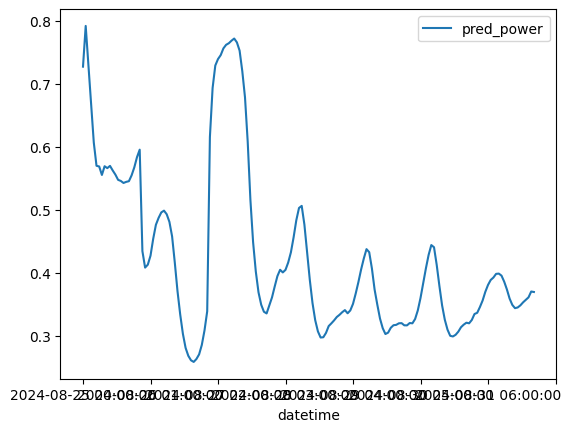

In [ ]:
tmp = result_df[result_df["건물번호"] == 7]
tmp.plot(x="datetime", y="pred_power")


In [ ]:
sub

,num_date_time,answer
0,1_20240825 00,0.300042
1,1_20240825 01,0.300999
2,1_20240825 02,0.311829
3,1_20240825 03,0.326825
4,1_20240825 04,0.338409
...,...,...
16795,100_20240831 19,0.529337
16796,100_20240831 20,0.529147
16797,100_20240831 21,0.528348
16798,100_20240831 22,0.526850


In [ ]:

df = sub.copy()

df[["building", "date_hour"]] = df["num_date_time"].str.split("_", expand=True)
df[["date", "hour"]] = df["date_hour"].str.split(" ", expand=True)
df = df.drop(columns=["date_hour"])

df["building"] = df["building"].astype(int)
df["datetime"] = pd.to_datetime(df["date"] + " " + df["hour"] + ":00")

In [ ]:
df

,num_date_time,answer,building,date,hour,datetime
0,1_20240825 00,0.300042,1,20240825,00,2024-08-25 00:00:00
1,1_20240825 01,0.300999,1,20240825,01,2024-08-25 01:00:00
2,1_20240825 02,0.311829,1,20240825,02,2024-08-25 02:00:00
3,1_20240825 03,0.326825,1,20240825,03,2024-08-25 03:00:00
4,1_20240825 04,0.338409,1,20240825,04,2024-08-25 04:00:00
...,...,...,...,...,...,...
16795,100_20240831 19,0.529337,100,20240831,19,2024-08-31 19:00:00
16796,100_20240831 20,0.529147,100,20240831,20,2024-08-31 20:00:00
16797,100_20240831 21,0.528348,100,20240831,21,2024-08-31 21:00:00
16798,100_20240831 22,0.526850,100,20240831,22,2024-08-31 22:00:00


In [ ]:
scale_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ts_final/b_scale_m_info.csv") #건물별 min/max값
scale_dict = {int(r["건물번호"]): (r["min"], r["max"]) for _, r in scale_info.iterrows()}


In [ ]:
print(scale_dict.keys())           # 건물번호 전부 있는지
print(scale_dict[b_id])            # min,max 정상 저장됐는지

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
(np.float64(830.64), np.float64(3381.6))


In [ ]:

def inverse_scale(value, b_id):
    y_min, y_max = scale_dict[b_id]
    return value * (y_max - y_min) + y_min


df["answer"] = df.apply(lambda row: inverse_scale(row["answer"], row["building"]), axis=1)


In [ ]:
df

,num_date_time,answer,building,date,hour,datetime
0,1_20240825 00,3949.227051,1,20240825,00,2024-08-25 00:00:00
1,1_20240825 01,3954.857662,1,20240825,01,2024-08-25 01:00:00
2,1_20240825 02,4018.590748,1,20240825,02,2024-08-25 02:00:00
3,1_20240825 03,4106.837139,1,20240825,03,2024-08-25 03:00:00
4,1_20240825 04,4175.003195,1,20240825,04,2024-08-25 04:00:00
...,...,...,...,...,...,...
16795,100_20240831 19,2180.957637,100,20240831,19,2024-08-31 19:00:00
16796,100_20240831 20,2180.472449,100,20240831,20,2024-08-31 20:00:00
16797,100_20240831 21,2178.435447,100,20240831,21,2024-08-31 21:00:00
16798,100_20240831 22,2174.614302,100,20240831,22,2024-08-31 22:00:00


In [ ]:
sub["answer"] = df["answer"]

In [ ]:
sub

,num_date_time,answer
0,1_20240825 00,3949.227051
1,1_20240825 01,3954.857662
2,1_20240825 02,4018.590748
3,1_20240825 03,4106.837139
4,1_20240825 04,4175.003195
...,...,...
16795,100_20240831 19,2180.957637
16796,100_20240831 20,2180.472449
16797,100_20240831 21,2178.435447
16798,100_20240831 22,2174.614302


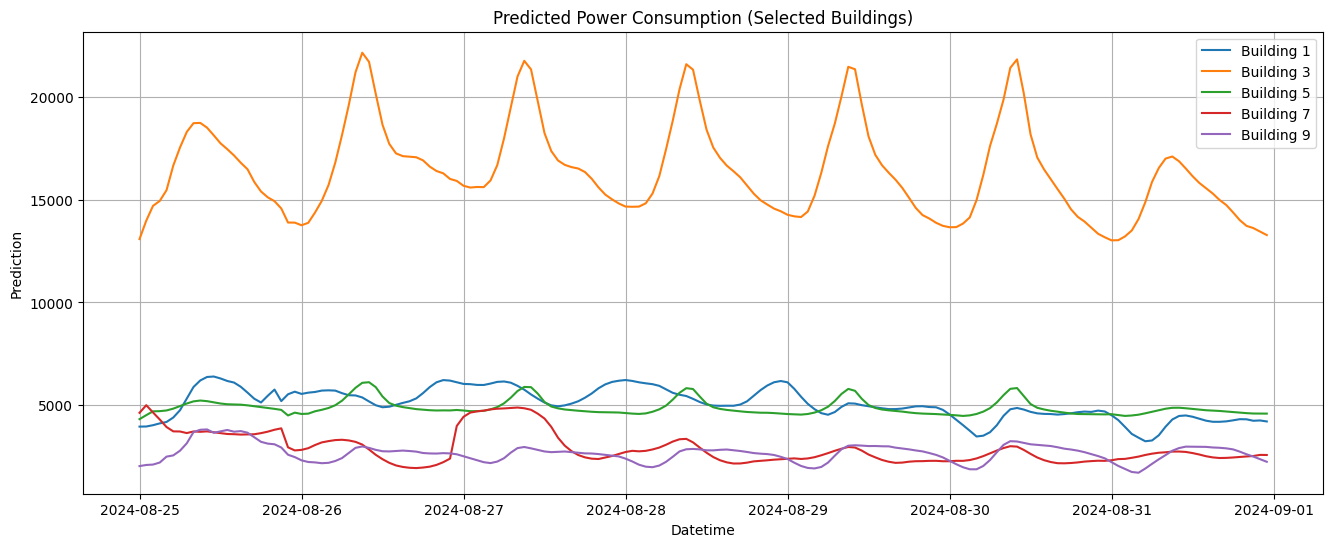

In [ ]:
import matplotlib.pyplot as plt

selected_buildings = [1, 3, 5, 7, 9]

plt.figure(figsize=(16, 6))

for b in selected_buildings:
    temp = df[df["building"] == b]
    plt.plot(temp["datetime"], temp["answer"], label=f"Building {b}")

plt.title("Predicted Power Consumption (Selected Buildings)")
plt.xlabel("Datetime")
plt.ylabel("Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
sub.to_csv("./sub_LSTM_001_inL_val85.csv", index=False)